# PHYS454 HW1
by Edward Sanchez

References: Hedberg, J. (2024) Introduction to using Astroquery and Astropy to retrieve data from JPL Horizons

All files available in GitHub
https://github.com/es2903/PHYS454/tree/main/HW1

In [1]:
# 1a. Plot the position of the sun, as well as a rectangle that shows the tower.
# Sun Tower imports and constants
from astroquery.jplhorizons import Horizons

# Our location is Huntsville, Alabama so we make a dictionary called huntsville
huntsville = {'lon': -86.59, 'lat': 34.73, 'elevation': 0.1771}

# Note" longitude is first. East is positive, West is negative.
# 'elevation' is in km above the reference ellipsoid
# https://astroquery.readthedocs.io/en/latest/api/astroquery.jplhorizons.HorizonsClass.html

In [48]:
# Converting regular time to Julian date (jd) with astropy.time function
from astropy.time import Time

time = '2024-02-01T12:30:00.00'
t = Time(time, format='isot', scale='utc')

print(f"The Julian Day is {t.jd:.3f}.")    # jd = Julian dates
print(t.to_value('iso','date'))            # to_value = converts jd to 01 Feb 2024

The Julian Day is 2460342.021.
2024-02-01


In [10]:
# Query Horizons for the position of the Sun
Sun = Horizons('Sun', location=huntsville, epochs=t.jd)
SunEph = Sun.ephemerides()

print(SunEph)            # prints out truncated table of data that Horizons returns
print(SunEph.columns)    # prints out the column names of SunEph
print(SunEph['AZ'])      # prints out values for Sun's Azimuthal position
print(SunEph['EL'])      # prints out values for Sun's elevation above horizon

targetname       datetime_str          datetime_jd    ...  PABLon  PABLat
   ---               ---                    d         ...   deg     deg  
---------- ------------------------ ----------------- ... -------- ------
  Sun (10) 2024-Feb-01 12:30:00.000 2460342.020833333 ... 311.7991 0.0002
<TableColumns names=('targetname','datetime_str','datetime_jd','solar_presence','flags','RA','DEC','RA_app','DEC_app','RA_rate','DEC_rate','AZ','EL','AZ_rate','EL_rate','sat_X','sat_Y','sat_PANG','siderealtime','airmass','magextinct','V','surfbright','illumination','illum_defect','sat_sep','sat_vis','ang_width','PDObsLon','PDObsLat','PDSunLon','PDSunLat','SubSol_ang','SubSol_dist','NPole_ang','NPole_dist','EclLon','EclLat','r','r_rate','delta','delta_rate','lighttime','vel_sun','vel_obs','elong','elongFlag','alpha','lunar_elong','lunar_illum','sat_alpha','sunTargetPA','velocityPA','OrbPlaneAng','constellation','TDB-UT','ObsEclLon','ObsEclLat','NPole_RA','NPole_DEC','GlxLon','GlxLat','solartime',

In [11]:
# Asking for Sun position at Huntsville, AL throughout the day for every 15 minutes
start_time = '2024-02-01T12:30:00.00'    # Sunrise on Feb01 was at 6:45 am and sunset was at 5:15 pm.
end_time = '2024-02-01T23:30:00.00'      # We have to adjust time because of UTC

feb01hunts = Horizons('Sun', location=huntsville, epochs={'start': start_time, 'stop': end_time, 'step': '15m'})
feb01huntsEph = feb01hunts.ephemerides() # what is ephemerides?

print(feb01huntsEph['datetime_str'])

   datetime_str  
       ---       
-----------------
2024-Feb-01 12:30
2024-Feb-01 12:45
2024-Feb-01 13:00
2024-Feb-01 13:15
2024-Feb-01 13:30
2024-Feb-01 13:45
2024-Feb-01 14:00
2024-Feb-01 14:15
2024-Feb-01 14:30
2024-Feb-01 14:45
              ...
2024-Feb-01 21:15
2024-Feb-01 21:30
2024-Feb-01 21:45
2024-Feb-01 22:00
2024-Feb-01 22:15
2024-Feb-01 22:30
2024-Feb-01 22:45
2024-Feb-01 23:00
2024-Feb-01 23:15
2024-Feb-01 23:30
Length = 45 rows


In [49]:
# Adding annotation for noon (CST)
print(feb01huntsEph['datetime_str'][22])

noon = {'x':feb01huntsEph['AZ'][22],'y':feb01huntsEph['EL'][22],'datetime':feb01huntsEph['datetime_str'][22]}

# Azimuthal angle and elevation at noon
print(f"At noon the azimuthal angle is {feb01huntsEph['AZ'][22]:.2f}.")
print(f"At noon the elevation angle is {feb01huntsEph['EL'][22]:.1f}")

2024-Feb-01 18:00
At noon the azimuthal angle is 180.04.
At noon the elevation angle is 38.2


Sketch of 40-m tall tower that is 100 m away
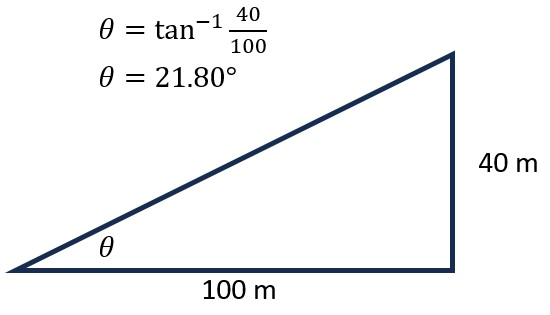

In [50]:
# Adding tower directly in front of me due south that is 100 m away, 40 meters tall, and 10 meters wide
import math as m
import numpy as np

tower_height = 40      # in meters
tower_width = 10       # in meters
dist_to_tower = 100    # in meters

tower_elev_angle = m.degrees(np.arctan(tower_height/dist_to_tower))
print(f"The tower elevation angle is {tower_elev_angle:.2f}.")
tower_azi_angle = m.degrees(np.arctan(0.5*tower_width/dist_to_tower))
print(f"The tower covers {tower_azi_angle:.2f} degrees in the azimuthal angle.")

The tower elevation angle is 21.80.
The tower covers 2.86 degrees in the azimuthal angle.


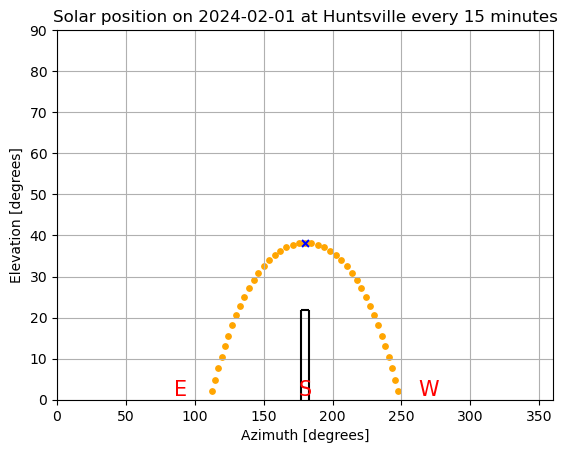

In [53]:
# Plotting the Sun's position from Huntsville, Al on 01 Feb 2024
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(feb01huntsEph['AZ'], feb01huntsEph['EL'], s=15, color='orange')
ax.set_xlabel('Azimuth [degrees]')
ax.set_ylabel('Elevation [degrees]')
ax.set_title("Solar position on "+t.to_value('iso','date')+" at Huntsville every 15 minutes")
ax.set_xlim(0,360)
ax.set_ylim(0,90)

# Place letters 'E', 'S', and 'W' for east, south, and west
ax.text(90, 0, 'E',
       verticalalignment='bottom', horizontalalignment='center',
       color='Red', fontsize=15)
ax.text(180, 0, 'S',
       verticalalignment='bottom', horizontalalignment='center',
       color='Red', fontsize=15)
ax.text(270, 0, 'W',
       verticalalignment='bottom', horizontalalignment='center',
       color='Red', fontsize=15)

# Place a blue 'x' on plot at noon position
ax.scatter(noon['x'], noon['y'], s=25, marker='x', color='blue')

# Tower plot
plt.hlines(y = tower_elev_angle, xmin = 180-tower_azi_angle,
           xmax = 180+tower_azi_angle, color='black')
plt.vlines(x = 180-tower_azi_angle, ymin = 0, ymax = tower_elev_angle,
          colors='black')
plt.vlines(x = 180+tower_azi_angle, ymin = 0, ymax = tower_elev_angle,
          colors='black')

ax.grid()
plt.show()

1b.	How high would the tower have to be (in meters) in order to block out the sun from your perspective?

Sketch of tower that blocks out the Sun from your perspective.
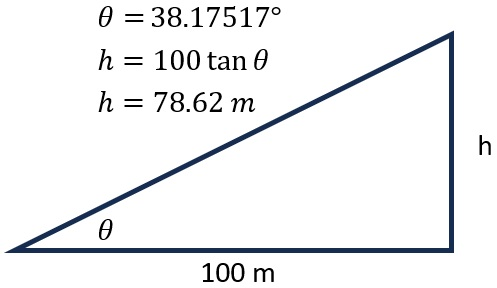

In [43]:
# Calculations for height of tower that blocks out the Sun.
theta = feb01huntsEph['EL'][22]
height = dist_to_tower * m.tan(m.radians(theta))
print(f"The tower must be taller than {height:.2f} meters to block out the Sun.")

The tower must be taller than 78.62 meters to block out the Sun.


In [87]:
#2. 1610 was an exciting year
paduaItaly = {'lon': 11.8768, 'lat': 45.4064, 'elevation': 0.012}

# From Siderius Nuncius translation 15 Jan 1610 third hour (aka 8 pm) on page 39
padua_time = '1610-01-15T20:00:00.00'
padua_t = Time(padua_time, format='isot', scale='utc')

print(f"The Julian Day is {padua_t.jd:.2f}.")    # jd = Julian dates
print(padua_t.to_value('iso','date'))            # to_value = converts jd

The Julian Day is 2309115.33.
1610-01-15


In [58]:
# Asking for positions of Jupiter and its moons on 13 January 1610 at 7 pm from Padua, Italy
# Jupiter = Horizons('Jupiter', location=paduaItaly, epochs=padua_t.jd)
# JupiterEph = Jupiter.ephemerides()
# print(JupiterEph)
# Above method did not work so I used the references listed below.

References
Horizons System manual
https://ssd.jpl.nasa.gov/horizons/manual.html

Horizons Web Application
https://ssd.jpl.nasa.gov/horizons/app.html#/

In [79]:
# Ephemerides tables for Jupiter and its moons on 15 January 1610 at 8 pm
rascensionJup = (5 + 4/60 + 57.18/3600)*15
declinationJup = 22 + 25/60 + 54.0/3600
print(f"The right ascension to degree conversion of Jupiter gives an azimuthal angle of {rascensionJup:.2f}.")
print(f"The declination to degree conversion of Jupiter gives an elevation angle of {declinationJup:.2f}.")

rascensionIo = (5 + 4/60 + 50.00/3600)*15
declinationIo = 22 + 25/60 + 49.1/3600
print(f"The RA and declination in degrees of Io are {rascensionIo:.2f} and {declinationIo:.2f}.")

rascensionEuropa = (5 + 4/60 + 43.48/3600)*15
declinationEuropa = 22 + 25/60 + 33.1/3600
print(f"The RA and declination in degrees of Europa are {rascensionEuropa:.2f} and {declinationEuropa:.2f}.")

rascensionGanymede = (5 + 4/60 + 36.44/3600)*15
declinationGanymede = 22 + 25/60 + 36.3/3600
print(f"The RA and declination in degrees of Ganymede are {rascensionGanymede:.2f} and {declinationGanymede:.2f}.")

rascensionCallisto = (5 + 4/60 + 19.93/3600)*15
declinationCallisto = 22 + 24/60 + 56.8/3600
print(f"The RA and declination in degrees of Callisto are {rascensionCallisto:.2f} and {declinationCallisto:.2f}.")

The right ascension to degree conversion of Jupiter gives an azimuthal angle of 76.24.
The declination to degree conversion of Jupiter gives an elevation angle of 22.43.
The RA and declination in degrees of Io are 76.21 and 22.43.
The RA and declination in degrees of Europa are 76.18 and 22.43.
The RA and declination in degrees of Ganymede are 76.15 and 22.43.
The RA and declination in degrees of Callisto are 76.08 and 22.42.


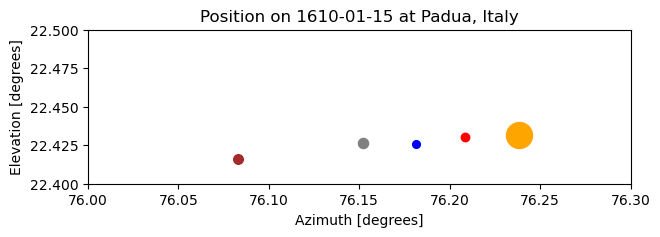

In [88]:
# Plotting the position of Jupiter and its moons on 15 January 1610
fig, ax = plt.subplots(figsize=(7, 2))
ax.scatter(feb01huntsEph['AZ'], feb01huntsEph['EL'], s=15, color='orange')
ax.set_xlabel('Azimuth [degrees]')
ax.set_ylabel('Elevation [degrees]')
ax.set_title("Position on "+padua_t.to_value('iso','date')+" at Padua, Italy")
ax.set_xlim(76.0,76.3)
ax.set_ylim(22.4,22.5)

# Positioning Jupitor and its moons 
ax.scatter(rascensionJup, declinationJup, s=350, marker='o', color='orange')
ax.scatter(rascensionIo, declinationIo, s=37, marker='o', color='red')
ax.scatter(rascensionEuropa, declinationEuropa, s=31, marker='o', color='blue')
ax.scatter(rascensionGanymede, declinationGanymede, s=53, marker='o', color='gray')
ax.scatter(rascensionCallisto, declinationCallisto, s=48, marker='o', color='brown')

plt.show()

Original drawing
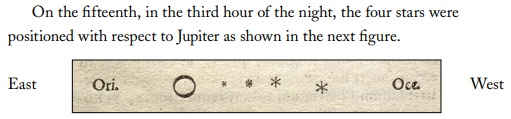

I looked up the position of Jupiter and its four Galilean moons using ephemerides tables on the Horizons system.
I plotted the right ascentions and declination in degrees and included the original drawing above.
They look like mirror images of one another. I wonder if this is because he used a lens telescope.
He wrote that the innermost moon (Io) was the smallest. It turns out that Europa is the smallest of the four.
He also wrote that the third one from Jupiter was raised a little. However, according to the ephemerides
tables from Horizons, the most north moon was Io.

In [91]:
# 3. Analemma plots
# 3.1. Observation position plot in Queens, NYC
# Query Horizons for the position of the Sun
from datetime import timedelta

queens = {'lon': -73.88165, 'lat': 40.75822, 'elevation': 0.025}
queens_time = Time("2024-01-01T17:00:00.00", format='isot', scale='utc')
print(f'The Julian date for 01 January 2024 is {queens_time.jd:.2f}.')

queens_timeDT = queens_time.to_datetime()
print(f'The date and time are {queens_timeDT}.')

delta_of_a_day = timedelta(days=1)
a_day_later = queens_timeDT + delta_of_a_day
print(f'1 day later: {a_day_later.strftime("%A, %B %d %Y, %I:%M%p")}.' )

The Julian date for 01 January 2024 is 2460310.79.
The date and time are 2024-01-01 07:00:00.
1 day later: Tuesday, January 02 2024, 07:00AM.


In [99]:
queens_start_time = '2024-01-01T17:00:00.00'    # Less 5 hours from UTC
queens_end_time = '2024-02-13T17:00:00.00'      # 

queens2024Sun = Horizons('Sun', location=queens, epochs={'start': queens_start_time, 'stop': queens_end_time, 'step': '1d'})
queens2024SunEph = queens2024Sun.ephemerides() # what is ephemerides?

print(queens2024SunEph['datetime_str'])


   datetime_str  
       ---       
-----------------
2024-Jan-01 17:00
2024-Jan-02 17:00
2024-Jan-03 17:00
2024-Jan-04 17:00
2024-Jan-05 17:00
2024-Jan-06 17:00
2024-Jan-07 17:00
2024-Jan-08 17:00
2024-Jan-09 17:00
2024-Jan-10 17:00
              ...
2024-Feb-04 17:00
2024-Feb-05 17:00
2024-Feb-06 17:00
2024-Feb-07 17:00
2024-Feb-08 17:00
2024-Feb-09 17:00
2024-Feb-10 17:00
2024-Feb-11 17:00
2024-Feb-12 17:00
2024-Feb-13 17:00
Length = 44 rows


In [100]:
# Checking azimuthal angles and elevation angles
print(queens2024SunEph['AZ'])
print(queens2024SunEph['EL'])

    AZ    
   deg    
----------
180.271767
180.151722
180.032756
179.914955
179.798411
179.683213
179.569455
179.457231
179.346641
179.237787
       ...
177.317328
177.278524
177.242969
177.210701
177.181764
177.156201
177.134059
177.115386
177.100224
177.088608
Length = 44 rows
    EL   
   deg   
---------
26.236903
 26.32323
26.416983
26.518127
26.626621
26.742421
26.865481
26.995747
27.133164
27.277669
      ...
32.968661
33.268989
33.574013
33.883615
 34.19768
34.516088
34.838719
35.165456
35.496179
35.830766
Length = 44 rows


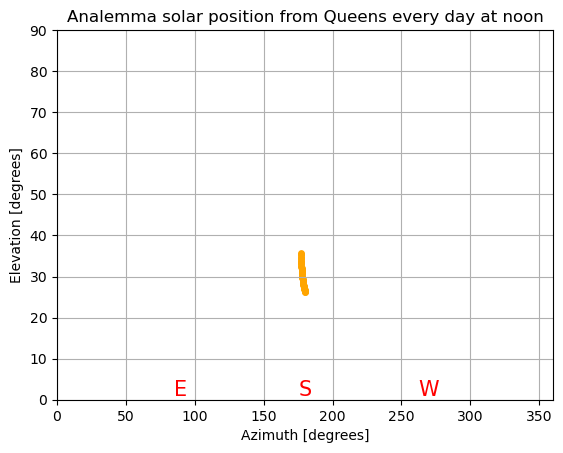

In [109]:
# Plotting the Sun's position from Queens at noon from 01 Jan 2024 to 13 Feb 2024

fig, ax = plt.subplots()
ax.scatter(queens2024SunEph['AZ'], queens2024SunEph['EL'], s=15, color='orange')
ax.set_xlabel('Azimuth [degrees]')
ax.set_ylabel('Elevation [degrees]')
ax.set_title("Analemma solar position from Queens every day at noon")
ax.set_xlim(0,360)
ax.set_ylim(0,90)

# Place letters 'E', 'S', and 'W' for east, south, and west
ax.text(90, 0, 'E',
       verticalalignment='bottom', horizontalalignment='center',
       color='Red', fontsize=15)
ax.text(180, 0, 'S',
       verticalalignment='bottom', horizontalalignment='center',
       color='Red', fontsize=15)
ax.text(270, 0, 'W',
       verticalalignment='bottom', horizontalalignment='center',
       color='Red', fontsize=15)

ax.grid()
plt.show()

In [102]:
# 3.2. Southern hemisphere location

borabora = {'lon': -151.73507, 'lat': -16.50168, 'elevation': 0.727}    # Mount Otemanu
borabora_time = Time("2024-01-01T22:00:00.00", format='isot', scale='utc')

borabora_start_time = '2024-01-01T22:00:00.00'    # Less 10 hours from UTC
borabora_end_time = '2024-02-12T22:00:00.00'      

borabora2024Sun = Horizons('Sun', location=borabora, epochs={'start': borabora_start_time, 'stop': borabora_end_time, 'step': '1d'})
borabora2024SunEph = borabora2024Sun.ephemerides()

In [103]:
# Checking azimuthal angles and elevation angles
print(queens2024SunEph['AZ'])
print(queens2024SunEph['EL'])

    AZ    
   deg    
----------
180.271767
180.151722
180.032756
179.914955
179.798411
179.683213
179.569455
179.457231
179.346641
179.237787
       ...
177.317328
177.278524
177.242969
177.210701
177.181764
177.156201
177.134059
177.115386
177.100224
177.088608
Length = 44 rows
    EL   
   deg   
---------
26.236903
 26.32323
26.416983
26.518127
26.626621
26.742421
26.865481
26.995747
27.133164
27.277669
      ...
32.968661
33.268989
33.574013
33.883615
 34.19768
34.516088
34.838719
35.165456
35.496179
35.830766
Length = 44 rows


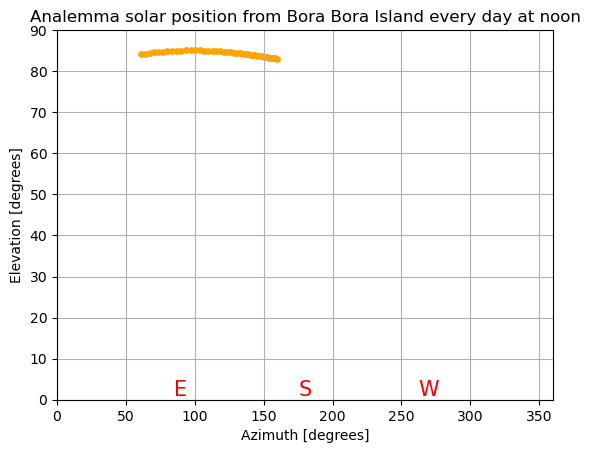

In [108]:
# Plotting the Sun's position from Bora Bora Island at noon from 01 Jan 2024 to 12 Feb 2024

fig, ax = plt.subplots()
ax.scatter(borabora2024SunEph['AZ'], borabora2024SunEph['EL'], s=15, color='orange')
ax.set_xlabel('Azimuth [degrees]')
ax.set_ylabel('Elevation [degrees]')
ax.set_title("Analemma solar position from Bora Bora Island every day at noon")
ax.set_xlim(0,360)
ax.set_ylim(0,90)

# Place letters 'E', 'S', and 'W' for east, south, and west
ax.text(90, 0, 'E',
       verticalalignment='bottom', horizontalalignment='center',
       color='Red', fontsize=15)
ax.text(180, 0, 'S',
       verticalalignment='bottom', horizontalalignment='center',
       color='Red', fontsize=15)
ax.text(270, 0, 'W',
       verticalalignment='bottom', horizontalalignment='center',
       color='Red', fontsize=15)

ax.grid()
plt.show()